# Objetivos do Trabalho
O objetivo deste trabalho é aplicar métodos de aprendizado por reforço a um problema escolhido e modelado pelos estudantes, comparando os resultados obtidos pelos métodos Monte Carlo, Q-Learning e SARSA(lambda), avaliando: qualidade das soluções, custo computacional, tamanho do espaço de estados, tamanho do espaço de ações e influência da função de reforço no resultado. Também pretende-se aplicar aproximadores lineares de função a cada método e comparar o desempenho de cada método **com** e **sem** o aproximador de função.

# Membros do Grupo e Contribuições

### Ana Clara Zoppi Serpa (RA 165880)
- Implementação do método Monte Carlo
- Implementação do método SARSA(lambda)
- Escrita do relatório
- Formulação do problema como MDP
- Análise de resultados

### Gabriel Oliveira dos Santos (RA 197460)
- Implementação do método Q-Learning
- Implementação do método SARSA
- Experimentos com diferentes funções de reforço, nos métodos Q-Learning e SARSA
- Formulação do problema como MDP

### Silvio Bento Garcia Junior (RA 265194)
- Melhorias nos experimentos com o método de Monte Carlo, explorando diferentes funções de reforço
- Realização de experimentos com os métodos SARSA(lambda) e com o Aproximador Linear de Função em todos os métodos
- Formulação do problema como MDP
- Construção das tabelas com resultados experimentais
- Gravação do vídeo

### Tito Barbosa Rezende (RA 025327)
- Implementação dos métodos Monte Carlo e SARSA(lambda)
- Implementação do Aproximador Linear de Função para todos os métodos
- Formulação do problema como MDP
- Análise de resultados e revisão de relatório

# Problema
Escolhemos trabalhar com o jogo Snake, também conhecido como "Serpente" ou "Jogo da Cobrinha", disponível em https://www.google.com/fbx?fbx=snake_arcade.

O jogador é uma cobra, inicialmente pequena, e seu objetivo é comer maçãs. A cobra pode se mover para cima, para baixo, para a esquerda e para a direita. Maçãs aparecem em posições aleatórias do mapa, e o jogador deve se movimentar a fim de passar pela posição que contém a maçã atual. O jogador pode se mover livremente, mas não pode colidir com as bordas do mapa (paredes), nem com seu próprio corpo. Conforme as maçãs são consumidas, o tamanho da cobra aumenta, e há mais risco de colidir com seu próprio corpo ao se movimentar pelo mapa, assim aumentando a dificuldade do jogo.

## Link para o vídeo

https://drive.google.com/file/d/1EYHiefCNMUoOwjDHNpE8mBejVFa0W6Nw/view?usp=sharing

## Formulação do problema como MDP

Conforme visto em aula, um Processo Decisório de Markov (MDP) é uma tupla <S, P, A, R, gamma>, sendo S um conjunto finito de estados, A um conjunto finito de ações, P uma matriz de probabilidades de transições entre estados, R uma função de reforço e gamma um fator de desconto, que é um número real no intervalo [0,1].

Um estado é uma tupla com 11 valores booleanos:
1. Se há perigo (parede ou o próprio corpo da cobra) uma ou duas unidades do tabuleiro à frente;
2. Se há perigo uma ou duas unidades à direita;
3. Se há perigo uma ou duas unidades à esquerda;
4. Se a cobra está se movendo para a esquerda;
5. Se a cobra está se movendo para a direita;
6. Se a cobra está se movendo para cima;
7. Se a cobra está se movendo para baixo.
8. Se há comida à esquerda;
9. Se há comida à direita;
10. Se há comida para cima;
11. Se há comida para baixo;

Há 2^11 estados possíveis.

Essas direções (esquerda, direita, cima, baixo) são sempre consideradas na perspectiva da cabeça da cobra.

As ações possíveis são:
- Continuar indo na mesma direção, representada pelo vetor [1,0,0];
- Virar para a direita, representada por [0,1,0];
- Virar para a esquerda, representada por [0,0,1];

A tela de jogo tem 440 pixels de largura e 440 pixels de altura. Cada parte do corpo da cobra é um quadrado de 20 pixels de altura e 20 pixels de largura. A maçã tem 20 pixels de altura e 20 pixels de largura também.

A matriz de transição de probabilidades P contém somente uns e zeros, pois dada uma posição (estado) atual no tabuleiro e uma ação, o resultado é sempre o mesmo. Para cada estado atual **s**, estado resultante **s'** quando tomada uma ação **a** e estados restantes **Z** que não são obtidos tomando **a** a partir de **s**, a probabilidade de ir de **s** para **s'** é 1, enquanto que de **s** a qualquer dos **Z** é zero. Isso vale para todos os estados e ações, por isso a matriz terá somente zeros e uns.

Quanto à função de reforço, definimos uma função padrão e depois exploramos outras. Isso será detalhado mais adiante no relatório, assim como os diferentes fatores de desconto (gamma) adotados nos experimentos.

## Natureza do ambiente

* Determinístico ou estocástico: **determinístico**, pois, dado um estado corrente e uma ação, o estado resultante é sempre o mesmo (dada uma posição, a ação de continuar na mesma direção/virar para a direita/virar para a esquerda leva sempre ao mesmo destino).

* Contínuo ou discreto: **discreto**, já que temos um conjunto finito de ações que podemos escolher tomar a partir de um certo estado (virar para a direita, virar para a esquerda, continuar na mesma direção).

* Episódico ou não episódico: **episódico**, sendo cada episódio um jogo. O episódio termina somente quando a cobra morre.

* Single-agent ou multi-agent: **single-agent**, pois nosso único agente é a cobra.

## Modelo de discretização adotado

Como nosso ambiente já é discreto, não precisamos adotar nenhuma estratégia de discretização.

## Estados terminais

Nossos estados terminais são aqueles referentes à morte da cobra, portanto ocorrem somente auando a cobra colide com a parede e quando a cobra colide com seu próprio corpo.

## Funções de Reforço

Nossa **função de reforço padrão** foi -10 quando a cobra morre, +10 quando come a maçã e 0 caso contrário.

```
def default_reward(env):
    """
    Return the reward.
    The reward is:
        -10 when Snake crashes.
        +10 when Snake eats food
        0 otherwise
    """
    reward = 0
    if env.game.crash:
        reward = -10
    elif env.player.eaten:
        reward = 10

    return reward
```

Exploramos também as seguintes funções de reforço alternativas:

* Função **reward1**: visa penalizar a cobra por não estar comendo a maçã.

```
def reward1(env):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        -1 otherwise
    """
    reward = -1
    if env.game.crash:
        reward = -100
    elif env.player.eaten:
        reward = 100

    return reward
```

* Função **reward_linear**: visa penalizar a cobra por cada momento em que não melhorar seu desempenho. É possível fornecer diferentes penalizações com o parâmetro penalty_rate.

```
def reward_linear(env, penalty_rate=0.01):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        -0.01*non_improvement otherwise
    """
    global non_improvement
    reward = -non_improvement*penalty_rate
    if env.game.crash:
        reward = -100
    elif env.player.eaten:
        reward = 100
        non_improvement = 0
    else:
        non_improvement += 1

    return reward
```

* Função **reward_euclidean**: visa penalizar a cobra quando está longe da maçã, e recompensá-la quando está perto. Implementamos essa função de reforço numa tentativa de melhorar nossos resultados com o algoritmo de Monte Carlo.

```
def reward_euclidean(env):
    player_pos = [env.player.x, env.player.y]
    food_pos = [env.food.x_food, env.food.y_food]
    dist = distance.euclidean(player_pos, food_pos)
    reward = 0
    if env.game.crash:
        reward = -10000
    elif env.player.eaten:
        reward = 10000
    else:
        if dist > 100:
            reward = (-1*dist)/10
        if dist <= 100:
            reward = (100-dist)/10

    return reward
```
## Política

A política usada em todos os experimentos foi a **epsilon-greedy**, na qual o agente escolhe suas ações de forma gulosa com respeito à **função ação-valor**. A função ação-valor indica qual é o reforço esperado ao realizar certa ação, estando num certo estado. Dessa forma, agindo gulosamente com respeito à função ação-valor, o agente escolherá ações para as quais ele imagina que receberá a maior quantidade possível de reforço positivo.

No entanto, para garantir que o agente explore outras ações em vez de realizar sempre as mesmas escolhas, com probabilidade epsilon uma ação aleatória será escolhida em vez da ação gulosa.

Os métodos Monte Carlo e SARSA são métodos **on-policy** pois neles a política que o agente busca melhorar é a própria política que ele está utilizando para interagir com o ambiente, no caso, a própria epsilon-greedy. Já o método Q-Learning se caracteriza como **off-policy** pois nele o agente se comporta conforme a epsilon-greedy, mas está procurando aprender outra política.

## Parâmetros

Exploramos os parâmetros gamma, alfa e N0 em nossos experimentos.

* Fator de desconto (gamma): regula o quanto o agente prioriza reforços futuros. Se gamma for baixo, o desconto de reforços futuros é baixo, e o agente dará atenção a possíveis reforços futuros. Se gamma for alto, o desconto será alto, e o agente se comportará priorizando reforços de curto prazo.

* Passo de aprendizado / "step-size" (alfa): regula o ajuste que é realizado na função ação-valor conforme o agente interage com o ambiente, ou seja, o quanto ele aprende com a diferença entre reforços reais e reforços que ele imaginava que receberia com seu comportamento.

* N0: constante utilizada para inicialização dos métodos. É usada no cálculo da probabilidade epsilon da política epsilon-greedy (epsilon = N0/(N0 + N(s_t)), sendo N(s_t) o número de visitas a um certo estado s, no instante t).


# Pontos-chave da implementação

### Arquivo agent.py

Neste arquivo há uma classe Agent, que serve como base para as demais (QLearningAgent, MonteCarloAgent, e assim por diante). Ela possui os métodos `choose_action` e `update`. O método `choose_action` é a política, ou seja, escolhe uma ação dado um estado de forma epsilon-greedy. O método `update` é deixado vazio nessa classe, pois cada método tem sua forma de atualizar a função ação-valor (atributo `Q` da classe).

Logo depois da classe Agent, temos as classes específicas para cada método. Um exemplo disso é a classe QLearningAgent, com sua implementação do método update:

```
def update(self, prev_state, next_state, reward, prev_action, next_action):
        """
        Update the action value function using the Q-Learning update.
        Q(S_t, A_t) = Q(S_t, A_t) + alpha(reward + (gamma * Max Q(S_t+1, *) - Q(S_t, A_t))
        Args:
            prev_state: The previous state
            next_state: The next state
            reward: The reward for taking the respective action
            prev_action: The previous action
            next_action: The next action
        Returns:
            None
        """
        alpha = 1 / self.state_action_counter[prev_state, prev_action]
        predict = self.Q[prev_state, prev_action]
        target = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[prev_state, prev_action] += alpha * (target - predict)
```

As outras classes (SARSAAgent, SARSALambdaAgent) foram implementadas similarmente, preenchendo o método `update` com a regra de atualização adequada. A classe MonteCarloAgent é uma exceção --- não implementa o método `update` pois a atualização da função ação-valor é realizada diretamente no método que executa os episódios.

### Arquivo base_classes.py

Neste arquivo estão classes relacionadas aos recursos gráficos do jogo e sua execução com a biblioteca PyGame: atualizar posição da cobra na tela, exibir maçãs em novos locais, etc.

### Arquivo environment.py

Temos neste arquivo a classe Environment, com funções `reset`, `step` e `__get_state`. A função `reset` recomeça o jogo uma vez que ele tenha terminado. A função `step` move a cobra conforme a ação que foi escolhida e retorna qual o novo estado e o reforço resultante disso. A função `__get_state` informa o estado atual --- a tupla de 11 booleanos, conforme descrito anteriormente.

### Funções para executar os métodos de aprendizado

Para executar cada método de aprendizado, foram definidas funções no Jupyter Notebook: `run_q_learning`, `run_sarsa`, `run_monte_carlo`. Aqui é exibida como exemplo `run_q_learning`.

- A seed é configurada.
- O ambiente é inicializado.
- Nosso dicionário de métricas é inicializado vazio.
- Guardamos o instante no qual a execução começou.
- Começamos os episódios.
- Um episódio começa com a chamada a `env.reset()`.
- Um episódio está contido no loop `while not done`.
- Dentro da execução do episódio atual, vemos qual o estado e o reforço após a execução da ação 1 escolhida ao iniciarmos o episódio.
- Atualizamos os valores da função ação-valor com uma chamada a `agent.update`.
- Acumulamos o reforço no contador de reforço do episódio corrente.
- Isso será repetido até o episódio acabar, então sempre será escolhida uma próxima ação, obtido um reforço e  atualizados os valores `Q` da função valor.
- Quando um episódio acaba, atualizamos as métricas, sendo a principal delas a pontuação obtida pela cobra no jogo.
- Observação: caso um único jogo (episódio) passe de 10 minutos de duração, a execução é interrompida.
- Quanto todos os episódios acabam, retornamos as métricas.

```
def run_q_learning(agent: Agent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()

        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics
```

### Realização de experimentos

Para realizar um experimento com certo método, definem-se os valores de N0 e gamma, cria-se um agente do tipo desejado e chama-se a função `run_` correspondente, passando como parâmetro a função de reforço, o número de episódios, a velocidade desejada para ver os movimentos da cobra e se o jogo será exibido ou não (variável `display`). Configurando `display` para False, os experimentos demoram menos tempo, então mantivemos `display` configurado como False para coletar os dados. Basta configurar `display=True` para visualizar o jogo.

Como exemplo, segue um experimento que pode ser feito com Q-Learning. Os outros experimentos são análogos.
```
N0 = 1
gamma = 1

# define agent
qLearningAgent = QLearningAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_q_learning(qLearningAgent, reward_function=default_reward, episodes=200, speed=5, display=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))
```

## Particularidades e restrições da implementação

Para executar o código, é preciso instalar a biblioteca PyGame. Isso pode ser feito com o comando `pip install pygame` no terminal.

# Métodos

Os métodos implementados são métodos de controle, ou seja, que visam melhorar a política conforme o agente interage com o ambiente. Isso é feito por meio da atualização dos valores `Q(s,a)` (função ação-valor), que indicam o reforço que o agente espera receber escolhendo uma ação `a` quando está num estado `s`. Conforme o agente interage com o ambiente e realiza ações, ele recebe reforços reais e ajusta `Q(s,a)`. Como `Q(s,a)` é utilizada nas próximas escolhas, o que ocorre é que o agente muda seu comportamento (**política**) conforme a atualização de `Q(s,a)` e os reforços positivos ou negativos recebidos.

Cada método difere em como atualiza `Q(s,a)`, produzindo diferentes resultados.

## Monte Carlo

### First-Visit

Q(s,a) é inicializado com zeros, assim como N(s,a), que indicará o número de vezes que, no estado **s**, a ação **a** foi escolhida. Epsilon é inicializado com 1, k é inicializado com 1.

Então, para cada episódio k, é feito o *sampling*: o episódio inteiro é executado seguindo a política, ou seja, começa-se num estado s_k_1, realiza-se a ação a_k_1, recebe-se o reforço r_k_1, chega-se ao estado s_k_2, e assim por diante, até o último estado do episódio, denotado por s_k_T.

Uma vez terminado o episódio, calcula-se o retorno dele, guardando na variável G. O retorno é a soma dos reforços obtidos em cada estado, multplicados pelo fator de desconto gamma.

Então, para cada período de 1 a T, atualiza-se N(s,a). No caso do *first-visit Monte Carlo*, N(s,a) será incrementado para contar as primeiras visitas ao estado **s** e ação **a** no episódio k. Também é atualizada a função ação-valor Q(s,a), somando ao valor atual a diferença entre o retorno ganho G_k_t e o retorno esperado Q_st_at, multiplicada pelo passo de aprendizado alfa = 1/N(s,a).

Depois disso, a política é melhorada, usando a atualização de Q(s,a) que acabamos de realizar.

![](montecarlo-first-visit-pseudocode.png)

### Every-Visit

No **every-visit Monte Carlo**, a diferença é que N(s,a) é incrementado considerando todas as visitas ao estado **s** e à ação **a**, em vez de somente a primeira visita. O **every-visit Monte Carlo** apresentou resultados melhores que o first-visit Monte Carlo neste trabalho.

Com o método de Monte Carlo, a atualização de Q(s,a) ocorre somente quando um episódio é terminado, ou seja, um jogo inteiro ocorre, com a cobra seguindo a política atual, e somente então a política é melhorada para ser utilizada num próximo jogo.

## SARSA

Inicializa-se Q(s,a) arbitrariamente, exceto no caso de estados terminais, que precisam ter Q(s,a) = 0. Para cada episódio, inicializa-se o estado atual S e escolhe-se uma ação A usando a política derivada de Q. **Para cada passo de aprendizado dentro do episódio atual**, a ação A escolhida é executada, sendo obtido o reforço R e o novo estado S'. Então, escolhe-se A' a partir de S', usando a política, e atualiza-se Q.

Na atualização de Q, utilizamos o passo de aprendizado alfa, o reforço R obtido, o valor Q(S', A') e o valor Q(S,A): ou seja, estamos atualizando Q(S,A) levando em conta o reforço obtido ao executar A e o reforço que imaginamos receber com Q(S', A').

Atualiza-se o estado atual para S' e a ação atual para A'.

Isso é feito dentro de cada episódio, até que todos os episódios acabem. A principal diferença do SARSA em relação ao Monte Carlo é o aprendizado (atualização de Q) ao longo dos passos do episódio, e não só depois que o episódio já acabou, por ser um método baseado em diferença temporal.

![](sarsa-pseudocode.png)

## SARSA(lambda)

No SARSA(lambda), para cada episódio há um conjunto E(S,A) que será usado na atualização de Q. Para cada passo de aprendizado de um episódio, uma ação A é tomada, sendo obtido o reforço R e um novo estado S'. É escolhida A' a partir de S'. Então, calcula-se delta usando R, o fator de desconto gamma, Q(S', A') e Q(S, A). O valor delta é o reforço obtido executando A, mais o valor que se espera receber executando A', com o desconto temporal gamma, menos o valor que se esperava receber executando A.

E(S,A) é incrementado. Depois, para cada estado s e ação a, atualiza-se Q usando o passo de aprendizado alfa, delta e o valor E(s,a). E(S,A) também é atualizado usando gamma, lambda e E(s,a).

A tabela E(S,A), chamada de **traços de eligibilidade**, deve funcionar como uma ponte entre métodos de diferença temporal e métodos Monte Carlo. Trata-se de uma memória temporária da ocorrência de um evento, então quando ocorre um erro, somente os estados e ações elegíveis são "culpados" pelo erro.

![](sarsa-lambda-pseudocode.png)

## Q-Learning

O Q-Learning é bastante similar ao SARSA, mas a sua forma de atualizar Q(S,A) é diferente. Em vez de utilizar Q(S', A'), utiliza o maior valor dentre os Q(S', a) para todas as ações **a**.

![](qlearning-pseudocode.png)

## Aproximador Linear de Função

Os métodos discutidos armazenam Q(s,a) como uma tabela e atualizam suas entradas conforme o aprendizado. No entanto, para problemas com muitos estados e/ou ações, utilizar tabelas pode não ser viável dependendo das restrições de memória. O jogo Go por exemplo possui 10^170 estados. Aproximadores de Função, ao invés de armazenar Q como uma tabela, aproximam Q(s,a) com uma função parametrizável. Então, em vez de consultar os valores reais na tabela a função aproximadora estima qual o valor de Q(s,a). Podem ser usadas quaisquer aproximações que se deseje, por exemplo, com Redes Neurais. Neste trabalho utilizamos um Aproximador Linear de Função (LFA).


# Discussão de Resultados

Nas tabelas a seguir, mostramos os parâmetros utilizados e resultados obtidos para cada método. As células com tempo de execução vermelho (coluna `run time`) são células nas quais um jogo passou de 10 minutos e a execução foi interrompida --- observamos esse comportamento em alguns casos, pois a cobra optou por ficar girando no mapa em vez de se deslocar na direção da maçã. Apresentamos, em algumas tabelas, a contagem de episódios que aconteceram antes de a execução ser interrompida por este motivo (coluna `episodes`).

As métricas que utilizamos para avaliar a qualidade das soluções foram a pontuação máxima atingida pela cobra e a média das pontuações dos últimos 50 jogos.

## Comparação dos métodos

![](results/tabela-monte-carlo.png)

Para o método Monte Carlo, exploramos as funções de recompensa padrão e reward_euclidean, que busca penalizar a cobra por estar distante da maçã. Exploramos tanto a variante first-visit quanto a variante every-visit. Os bons casos que identificamos são:

- (First Visit) N0 = 1, gamma = 0.2, reward_euclidean: pontuação máxima = 27, média das últimas 50 pontuações = 7.48, tempo de execução = 99.6431 segundos.
- (First Visit) N0 = 1, gamma = 0.2, default_reward: pontuação máxima = 28, média das últimas 50 pontuações = 8.44, tempo de execução = 10.0414 segundos.
- (Every Visit) N0 = 1, gamma = 0.5, default_reward: pontuação máxima = 50, média das últimas 50 pontuações = 2.2020, tempo de execução = 10.5174 segundos.
- (Every Visit) N0 = 1, gamma = 1, default_reward: pontuação máxima = 49, média das últimas 50 pontuações = 16.84, tempo de execução = 8.6560 segundos.

![](results/tabela-qlearning.png)

Para o Q-Learning, sem Aproximador Linear de Função, identificamos dois casos que consideramos ótimos:
- Com N0 = 0.5 e gamma = 0.98, utilizando a função de reforço reward_linear sem nenhuma penalização, a cobra obteve 72 como pontuação máxima e 35.1 como média das últimas 50 pontuações, com tempo de execução 74,5140 segundos;
- Com N0 = 0.5 e gamma = 0.98, utilizando a função de reforço reward_linear com penalty_rate = 0.05, a cobra obteve 72 como pontuação máxima e 41.04 como média das últimas 50 pontuações, em 94.3793 segundos;

![](results/tabela-sarsa.png)

Para o SARSA, sem Aproximador Linear de Função, também encontramos dois casos que consideramos ótimos:
- N0 = 1, gamma = 1, função de reforço padrão (default_reward): a cobra obteve 70 como pontuação máxima e 30.96 como pontuação média dos 50 últimos jogos, em 30.8162 segundos;
- N0 = 1, gamma = 0.99, função de reforço reward_linear com penalidade = 0.2: a cobra obteve 70 como pontuação máxima e 31.86 como pontuação média dos últimos jogos, em 33.8256 segundos;

O Q-Learning e o SARSA apresentaram casos ótimos bem próximos em termos de pontuação máxima e média das últimas pontuações, mas o tempo de execução do SARSA foi bem menor. Isso sugere que os dois algoritmos são adequados para o problema, e que SARSA tem vantagem sobre Q-Learning na velocidade do aprendizado da cobra.

Os valores de gamma usados foram bem próximos de 1 nestes dois casos, o que indica que priorizar recompensas imediatas ("pensar a curto prazo" em vez de "pensar a longo prazo") é bom para o agente deste problema. Os resultados também indicam que a função de reforço padrão e a função de reforço reward_linear com uma pequena penalização para momentos nos quais a cobra não melhorou sua pontuação são adequadas para o problema.

Monte Carlo every-visit foi melhor que first-visit para o problema, mas ainda bastante inferior aos métodos SARSA e Q-Learning em termos de pontuação máxima. Como o método de Monte Carlo atualiza os valores da função ação-valor somente ao final de um episódio (jogo), esse resultado é compatível com nossa expectativa de que seu desempenho fosse pior para este problema. Todos os métodos foram comparados com a mesma quantidade de episódios (1000), e acreditamos que o método de Monte Carlo precisaria de mais episódios para atingir pontuações maiores.

Quanto à função de recompensa reward_euclidean, observamos que, para o início do jogo, funciona bem, incentivando a cobra a se aproximar da maçã. No entanto, conforme o comprimento da cobra aumenta, se aproximar da maçã sem antes se afastar para contornar e evitar colisões com seu próprio corpo causa sua morte. Assim, reward_euclidean é boa para os estágios iniciais do jogo, mas não para todo o jogo. Um experimento futuro interessante seria alterar a função de reforço conforme o comprimento da cobra, unindo as melhores características da função padrão às da função reward_euclidean.

![](results/tabela-sarsa-lambda.png)

O melhor caso do método SARSA-lambda, no qual a cobra obteve 43 de pontuação máxima, ocorreu com N0 = 1, gamma = 1 e lambda = 0.2. No entanto, o tempo de execução ultrapassou o limite de 10 minutos em todos os experimentos, e as pontuações obtidas foram consideravelmente menores que as do Q-Learning e do SARSA comum. Isso indica que o SARSA-lambda não foi adequado para o problema, ou que a função de reforço adotada para os experimentos com SARSA-lambda (default_reward) não foi adequada, causando loops nos quais a cobra se movimentava pelo mapa e se mantinha viva, mas não ia atrás da maçã. Experimentar outros valores de lambda, gamma, e outras funções de recompensa seria uma melhoria futura interessante.

Conforme desenvolvemos o projeto, encontramos um artigo (http://cs229.stanford.edu/proj2012/JohnsonRobertsFisher-LearningToPlay2DVideoGames.pdf) sobre o uso de SARSA-lambda em vários jogos (inclusive Snake), e, nele, os autores mencionam que o SARSA-lambda não obteve bons resultados, somente quando simplificaram o jogo fixando o comprimento da cobra. Não tentamos fixar o comprimento da cobra neste trabalho, mas seria, também, um experimento futuro interessante.

## Análise do uso do Aproximador Linear de Função

![](results/tabela-monte-carlo-lfa.png)

![](results/tabela-qlearning-lfa.png)

![](results/tabela-sarsa-lfa.png)

![](results/tabela-sarsa-lambda-lfa.png)

Utilizando o LFA (Aproximador de Função Linear) para o Q-Learning, os melhores casos ocorreram para N0 = 0.5, gamma = 0.98 com função de reforço reward_linear e penalidades 0.05 e 0.2, sendo pontuações máximas 23 e 22, respectivamente. Com o LFA, as pontuações foram piores, mas os tempos de execução foram menores.

Utlizando LFA para o método SARSA, foram identificados três casos ótimos, em negrito na tabela, com pontuações máximas 25, sendo usadas as funções de reforço padrão, reward1 e reward_linear. Em comparação com o SARSA sem LFA, as pontuações foram piores e o tempo de execução foi menor, assim como no Q-Learning.

Nos métodos Monte Carlo, tanto first-visit quanto every-visit, e SARSA-lambda, também houve piora na pontuação com o uso do LFA.

Como as pontuações pioraram significativamente com o uso do LFA, acreditamos que ele não é uma boa abordagem para o problema e que explorar aproximadores de função diferentes (por exemplo, redes neurais) poderia fornecer melhores resultados.


## Principais conclusões

Ao longo de todos os experimentos realizados, observamos que SARSA e Q-Learning são mais adequados para que o agente aprenda a coletar as maçãs e manter-se vivo no jogo, sendo nossos melhores resultados pontuação máxima 72 (Q-Learning) e 70 (SARSA). Exploramos diferentes funções de recompensa, e as mais adequadas foram a padrão (+10 de reforço por comer a maçã, -10 de reforço por morrer) e uma que penaliza a cobra caso passe muito tempo sem melhorar a sua pontuação, incentivando-a a se movimentar mais e procurar mais maçãs. Acreditamos que conseguimos atingir a política desejada para o agente com esses métodos.

Comparando os métodos SARSA e Q-Learning, que fazem bootstrapping (substituem parte da trajetória pelo palpite Q em vez de aguardar o término do episódio para aprender) e métodos que não o fazem, como é o caso do Monte Carlo, e métodos que o fazem parcialmente (SARSA-lambda), chegamos à conclusão de que bootstrapping é vantajoso para nosso problema, já que SARSA e Q-Learning obtiveram as melhores pontuações.

Quanto ao uso de aproximador linear de função, não nos ajudou a obter melhores resultados. Acreditamos que explorar outros aproximadores de função, por exemplo redes neurais que melhor aproveitem as características do estado, renderia bons resultados.

Observamos que, em alguns casos, o agente optou por andar pelo mapa, às vezes em círculos, mantendo-se vivo mas não se aproximando da maçã para comê-la. Isso fez com que alguns experimentos ultrapassassem o tempo limite de 10 minutos por jogo, e indica que medir a pontuação acumulada reflete melhor a qualidade da solução do que medir o tempo de execução --- a cobra poderia optar por se manter viva eternamente, mas sem pegar maçãs.

Acreditamos que explorar diferentes funções de reforço que passem a penalizar a cobra ao detectar que ela está se movendo em círculos, por exemplo, seria uma boa melhoria futura.

# Observações

Aqui neste notebook, colocamos exemplos de código para os principais experimentos, em particular o melhor caso de cada algoritmo estudado. Nos notebooks auxiliares entregues junto com este (pasta notebooks_auxiliares), há todos os experimentos que foram realizados para construção das tabelas e dos gráficos.

Além disso, para facilitar a demonstração, aqui os experimentos usam apenas 50 episódios, enquanto os que usamos efetivamente para avaliação dos métodos usaram 1000 episódios.

Gráficos são apresentados para os exemplos com 50 episódios deste notebook e discutidos, e usamos as tabelas para avaliar os métodos após 1000 episódios de execução e chegar a uma conclusão sobre quais são adequados para o problema.


# Referências

- Aulas da professora, disponibilizadas no Google Classroom da disciplina.

- Livro Reinforcement Learning: An Introduction, Sutton and Barto, 2a Edição.

### Artigos e exemplos de implementação

- Artigo sobre Snake com Deep Q-Learning: https://towardsdatascience.com/how-to-teach-an-ai-to-play-games-deep-reinforcement-learning-28f9b920440a

- Repositório do GitHub com Snake e Deep Q-Learning, no qual nos baseamos inicialmente para realizar o projeto: https://github.com/maurock/snake-ga

- Exemplo de implementação do SARSA: https://www.geeksforgeeks.org/expected-sarsa-in-reinforcement-learning/

- Artigo sobre SARSA(lambda) para vários jogos, inclusive Snake: http://cs229.stanford.edu/proj2012/JohnsonRobertsFisher-LearningToPlay2DVideoGames.pdf

- Exemplo de implementação de Aproximador de Função: https://github.com/metastableB/Naagin-Naggin/blob/master/dlsnake/agents/approxQAgent.py

- Exemplos de implementações de SARSA e Monte Carlo: https://github.com/ralhadeff/machine-learning-tools/tree/master/ReinforcementLearning

- Exemplos de implementações baseados no livro Reinforcement Learning: An Introduction: https://github.com/flyywh/reinforcement-learning-1

- Artigos sobre Snake, Q-Learning e SARSA: https://dkdennis.xyz/static/Nagging-report.pdf, http://cs229.stanford.edu/proj2016spr/report/060.pdf

### Outras páginas

- https://towardsdatascience.com/reinforcement-learning-rl-101-with-python-e1aa0d37d43b

- https://towardsdatascience.com/slitherin-solving-the-classic-game-of-snake-with-ai-part-2-general-purpose-random-monte-25dc0dd4c4cf

- https://towardsdatascience.com/function-approximation-in-reinforcement-learning-85a4864d566

- https://towardsdatascience.com/monte-carlo-learning-b83f75233f92

- https://medium.com/reinforcement-learning-a-step-by-step-implementati/reinforcement-learning-a-step-by-step-implementation-using-sarsa-1cfd3e64775a

- https://www.programmersought.com/article/94202345056/

- https://www.youtube.com/watch?v=l0sFUU7vScA

### Importação de bibliotecas e funções auxiliares

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygame
import seaborn as sns
import random
# our classes
from agent import Agent, QLearningAgent, MonteCarloAgent, SARSAAgent, SARSALambdaAgent
from agentLFA import AgentLFA, QLearningAgentLFA, MonteCarloAgentLFA, SARSAAgentLFA, SARSALambdaAgentLFA
from scipy.spatial import distance
from environment import Environment
from screen import Screen
# define environment
ACTION_SPACE = np.eye(3)
NUM_ACTIONS = 3
NUM_STATES = 2 ** 11
# Set options to activate or deactivate the game view, and its speed
pygame.font.init()

def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['episodes'])
    for i in range(n):
        episode = metrics['episodes'][i]
        score = metrics['scores'][i]
        reward = metrics['rewards'][i]

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)

def decode_state(encoded_state):
    """
    Decode a binary representation of a state into its decimal base;
    
    encoded_state: an array of 0s and 1s representing a binary value
    
    return: decimal value
    """
    decoded = ''
    for s in encoded_state:
        decoded += str(s)

    return int(decoded, 2)

def decode_action(encoded_action):
    if isinstance(encoded_action, np.ndarray):
        return encoded_action.argmax()
    return encoded_action

def default_reward(env):
    """
    Return the reward.
    The reward is:
        -10 when Snake crashes.
        +10 when Snake eats food
        0 otherwise
    """
    reward = 0
    if env.game.crash:
        reward = -10
    elif env.player.eaten:
        reward = 10

    return reward

global non_improvement 
non_improvement = 0
def reward_linear(env, penalty_rate=0.01):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        -0.01*non_improvement otherwise
    """
    global non_improvement
    reward = -non_improvement*penalty_rate
    if env.game.crash:
        reward = -100
    elif env.player.eaten:
        reward = 100
        non_improvement = 0
    else:
        non_improvement += 1

    return reward

def reward_euclidean(env):
    player_pos = [env.player.x, env.player.y]
    food_pos = [env.food.x_food, env.food.y_food]
    dist = distance.euclidean(player_pos, food_pos)
    reward = 0
    if env.game.crash:
        reward = -10000
    elif env.player.eaten:
        reward = 10000
    else:
        if dist > 100:
            reward = (-1*dist)/10
        if dist <= 100:
            reward = (100-dist)/10

    return reward

pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Monte Carlo

In [8]:
def run_monte_carlo(agent: Agent, reward_function, episodes, display, speed, verbose=True, first_visit=False):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}

    returns_sum = {}
    returns_count = {}

    start = time.time()
    while episode < episodes:
        states_and_actions_visited = []

        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            screen.display()

        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)

            states_and_actions_visited.append((state2, action2, reward))

            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        # Acabou o episódio, hora de aprender
        G = 0
        for i, step in enumerate(states_and_actions_visited[::-1]):
            state, action, r = step
            G = agent.gamma*G + r

            do_update = True

            if first_visit:
                if state in [x[0] for x in states_and_actions_visited[::-1][len(states_and_actions_visited)-i:]]:
                    do_update = False

            if do_update:
                sa_pair = (step[0], decode_action(step[1]))

                if sa_pair in returns_sum:
                    returns_sum[sa_pair] += G
                else:
                    returns_sum[sa_pair] = G

                if sa_pair in returns_count:
                    returns_count[sa_pair] += 1.0
                else:
                    returns_count[sa_pair] = 1

                average = returns_sum[sa_pair] / returns_count[sa_pair]
                agent.Q[sa_pair[0], sa_pair[1] ] = average

        # Incrementar episódios e ir guardando as nossas métricas
        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')


        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        print('Run time:', (end-start), 'seconds')
        print('Max. Score:', max(metrics['scores']))
        print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
    


    return metrics

def run_monte_carlo_experiment(n0, gamma, reward_function, first_visit):
    # define agent
    monteCarloAgent = MonteCarloAgent(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_monte_carlo(monteCarloAgent, reward_function=reward_function, episodes=50, speed=0, display=True, first_visit=first_visit)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

#### First Visit

Em nossos experimentos os melhores parâmetros encontrados para o Monte Carlo First Visit foram N0 = 1 e gamma = 0.2. A função de reward de melhor desempenho foi a default reward.
Estes resultados foram avaliados com 1000 episódios, no entanto, demonstramos abaixo a execução do método com 50 episódios.

O notebook com todos os experimentos se econtra em:  /notebooks/MonteCarlo.ipynb

Game 1      Score: 0
Run time: 0.5868587493896484 seconds
Max. Score: 0
Mean Last Scores: 0.0
Game 2      Score: 1
Run time: 1.822892427444458 seconds
Max. Score: 1
Mean Last Scores: 0.5
Game 3      Score: 1
Run time: 3.1045031547546387 seconds
Max. Score: 1
Mean Last Scores: 0.6666666666666666
Game 4      Score: 0
Run time: 4.004241704940796 seconds
Max. Score: 1
Mean Last Scores: 0.5
Game 5      Score: 0
Run time: 5.041631460189819 seconds
Max. Score: 1
Mean Last Scores: 0.4
Game 6      Score: 0
Run time: 5.882727146148682 seconds
Max. Score: 1
Mean Last Scores: 0.3333333333333333
Game 7      Score: 0
Run time: 6.8040759563446045 seconds
Max. Score: 1
Mean Last Scores: 0.2857142857142857
Game 8      Score: 0
Run time: 7.904644966125488 seconds
Max. Score: 1
Mean Last Scores: 0.25
Game 9      Score: 1
Run time: 9.316762208938599 seconds
Max. Score: 1
Mean Last Scores: 0.3333333333333333
Game 10      Score: 1
Run time: 10.714524745941162 seconds
Max. Score: 1
Mean Last Scores: 0.4
Game

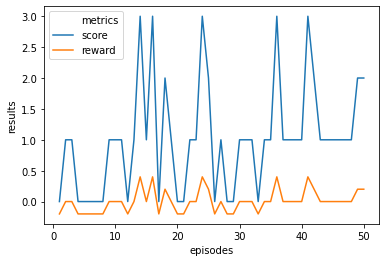

Run time: 57.64075422286987 seconds
Max. Score: 3
Mean Last Scores: 1.02


In [9]:
N0 = 1
gamma = 0.2
run_monte_carlo_experiment(N0, gamma, default_reward, first_visit=True)

Podemos observar que as pontuações (azul) variam bastante ao longo dos episódios, com picos nos quais são altas e picos nos quais são baixas. Isso era esperado, afinal o método Monte Carlo se caracteriza por ter bastante variância.

#### Every Visit
Já para o Every Visit, os melhores parâmetros encontrados foram com N0=1 e gamma = 0.5 com o default_reward.

Game 1      Score: 0
Run time: 0.5686333179473877 seconds
Max. Score: 0
Mean Last Scores: 0.0
Game 2      Score: 3
Run time: 2.20867657661438 seconds
Max. Score: 3
Mean Last Scores: 1.5
Game 3      Score: 1
Run time: 3.6487483978271484 seconds
Max. Score: 3
Mean Last Scores: 1.3333333333333333
Game 4      Score: 0
Run time: 4.502845048904419 seconds
Max. Score: 3
Mean Last Scores: 1.0
Game 5      Score: 2
Run time: 6.078808784484863 seconds
Max. Score: 3
Mean Last Scores: 1.2
Game 6      Score: 1
Run time: 7.136227607727051 seconds
Max. Score: 3
Mean Last Scores: 1.1666666666666667
Game 7      Score: 3
Run time: 8.526342153549194 seconds
Max. Score: 3
Mean Last Scores: 1.4285714285714286
Game 8      Score: 2
Run time: 9.591023445129395 seconds
Max. Score: 3
Mean Last Scores: 1.5
Game 9      Score: 2
Run time: 10.597987651824951 seconds
Max. Score: 3
Mean Last Scores: 1.5555555555555556
Game 10      Score: 1
Run time: 11.804102420806885 seconds
Max. Score: 3
Mean Last Scores: 1.5
Game 1

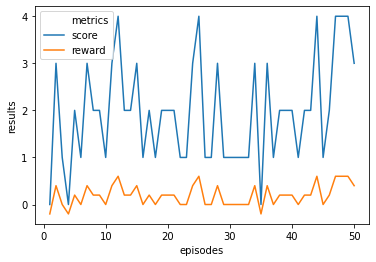

Run time: 63.19909358024597 seconds
Max. Score: 4
Mean Last Scores: 1.96


In [11]:
N0 = 1
gamma = 0.5
run_monte_carlo_experiment(N0, gamma, default_reward, first_visit=False)

Para o every visit a variação é maior ainda e podemos observar que ele atingiu pontuações melhores desde o início.

### SARSA

In [2]:
def run_sarsa(agent: Agent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()

        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics

def run_sarsa_experiment(n0, gamma, reward_function, penalty_rate):
    # define agent
    sarsaAgent = SARSAAgent(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=penalty_rate),
                             episodes=50, speed=0, display=True, verbose=True)
    end = time.time()
    
    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Para o SARSA os melhores parâmetros encontrados foram N0 = 1, gamma = 0.99 e penalty_rate = 0.2. Abaixo um exemplo com 50 episódios.

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 3
Game 16      Score: 3
Game 17      Score: 1
Game 18      Score: 3
Game 19      Score: 2
Game 20      Score: 5
Game 21      Score: 5
Game 22      Score: 1
Game 23      Score: 2
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 2
Game 27      Score: 2
Game 28      Score: 1
Game 29      Score: 4
Game 30      Score: 1
Game 31      Score: 10
Game 32      Score: 3
Game 33      Score: 3
Game 34      Score: 2
Game 35      Score: 4
Game 36      Score: 1
Game 37      Score: 3
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 2
Game 41      Score: 2
Game 42      Score: 5
Game 43      Score: 6
Game 44      Score: 4
Game 45      Score: 1
Game 46      Score

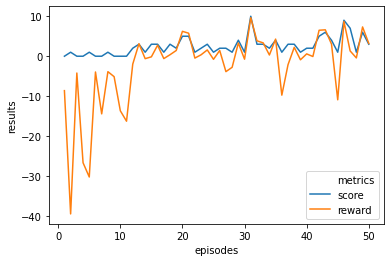

Run time: 75.27145195007324 seconds
Max. Score: 10
Mean Last Scores: 2.48


In [3]:
N0 = 1
gamma = 0.99
penalty_rate = 0.2
run_sarsa_experiment(N0, gamma, reward_linear, penalty_rate)

Podemos observar um aprendizado muito lento no início com bastante penalização. No entanto, conforme as tabelas apresentadas, com 1000 episódios de execução o SARSA superou o resultado de outros métodos (Monte Carlo e Sarsa Lambda).

#### Q-Learning

In [26]:
def run_q_learning(agent: Agent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()

        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        
    return metrics

def run_q_learning_experiment(n0, gamma, penalty_rate):
    qLearningAgent = QLearningAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_q_learning(qLearningAgent, reward_function=lambda env: reward_linear(env, penalty_rate=penalty_rate),
                                 episodes=50, speed=0, display=True, verbose=True)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Para o Q-Learning os melhores parâmetros encontrados foram N0=0.5, gamma=0.98, reward_linear e penalidade 0.05

Game 1      Score: 1
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 2
Game 5      Score: 1
Game 6      Score: 1
Game 7      Score: 1
Game 8      Score: 1
Game 9      Score: 3
Game 10      Score: 3
Game 11      Score: 4
Game 12      Score: 1
Game 13      Score: 2
Game 14      Score: 2
Game 15      Score: 6
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 5
Game 19      Score: 7
Game 20      Score: 2
Game 21      Score: 1
Game 22      Score: 7
Game 23      Score: 4
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 2
Game 27      Score: 12
Game 28      Score: 4
Game 29      Score: 4
Game 30      Score: 1
Game 31      Score: 5
Game 32      Score: 4
Game 33      Score: 3
Game 34      Score: 6
Game 35      Score: 1
Game 36      Score: 8
Game 37      Score: 5
Game 38      Score: 3
Game 39      Score: 4
Game 40      Score: 2
Game 41      Score: 3
Game 42      Score: 7
Game 43      Score: 1
Game 44      Score: 5
Game 45      Score: 6
Game 46      Score

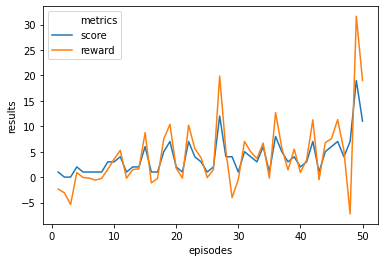

Run time: 78.90085792541504 seconds
Max. Score: 19
Mean Last Scores: 3.88


In [27]:
N0=0.5
gamma = 0.98
penalty_rate = 0.05
run_q_learning_experiment(N0, gamma, penalty_rate)

Podemos observar que o Q-Learning rapidamente conseguiu aprender e obter um score elevado de 19 maçãs. O desempenho com até 1000 execuções também foi muito bom demonstrando que para este problema o Q-Learning é um método adequado.

#### SARSA Lambda

In [29]:
def run_sarsa_lambda(agent: SARSALambdaAgent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()
        agent.reset_E()
        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics

def run_sarsa_lambda_experiment(n0, gamma, lambda_value):
    # define agent
    sarsaAgent = SARSALambdaAgent(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
    sarsaAgent.lambda_value = lambda_value

    start = time.time()
    metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=50, speed=0, display=True)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))


Para o SARSA Lambda os melhores parâmetros encontrados foram N0=1, gamma=1, default_reward e lambda 0.2

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 3
Game 29      Score: 5
Game 30      Score: 4
Game 31      Score: 7
Game 32      Score: 4
Game 33      Score: 5
Game 34      Score: 2
Game 35      Score: 3
Game 36      Score: 3
Game 37      Score: 4
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 4
Game 41      Score: 4
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Score

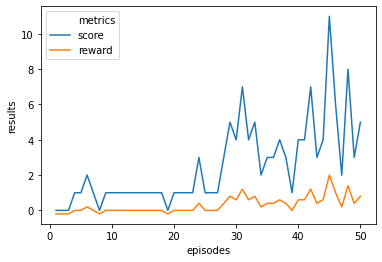

Run time: 94.72206830978394 seconds
Max. Score: 11
Mean Last Scores: 2.52


In [30]:
N0 = 1
gamma = 1
lambda_value = 0.2
run_sarsa_lambda_experiment(N0, gamma, lambda_value)

O resultado do Sarsa Lambda não foi muito satisfatório, embora o crescimento do score acompanhando os espisódios demonstre aprendizado. Observando o "display" do jogo notamos que em muitos momentos a cobra anda em círculos, sem sair do lugar e estoura o limite de tempo. Não conseguimos encontrar uma função de reward adequada nos nossos experimentos capaz de resolver esse problema. Acreditamos que explorar funções de reward diferentes seria interessante, ou detectar a partir do estado se a cobra está andando em círculos.

## Todos os experimentos foram repetidos com as implementações de Linear Function Aproximator

### Monte Carlo LFA

In [39]:
def run_monte_carloLFA(agent: AgentLFA, reward_function, episodes, display, speed, verbose=True, first_visit=False):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}

    returns_sum = {}
    returns_count = {}

    start = time.time()
    while episode < episodes:
        states_and_actions_visited = []

        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            screen.display()

        state1, done = env.reset()
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)

            states_and_actions_visited.append((state2, action2, reward))

            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        # Acabou o episódio, hora de aprender
        G = 0
        for i, step in enumerate(states_and_actions_visited[::-1]):
            state, action, r = step
            G = agent.gamma*G + r

            do_update = True

            if first_visit:
                if state in [x[0] for x in states_and_actions_visited[::-1][len(states_and_actions_visited)-i:]]:
                    do_update = False

            if do_update:
                sa_pair = (decode_state(step[0]), decode_action(step[1]))

                if sa_pair in returns_sum:
                    returns_sum[sa_pair] += G
                else:
                    returns_sum[sa_pair] = G

                if sa_pair in returns_count:
                    returns_count[sa_pair] += 1.0
                else:
                    returns_count[sa_pair] = 1

                average = returns_sum[sa_pair] / returns_count[sa_pair]
                agent.update(average, state, sa_pair[1])


        # Incrementar episódios e ir guardando as nossas métricas
        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)

        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break

    return metrics

def run_monte_carlo_lfa_experiments(n0, gamma, first_visit):
    # define agent
    monteCarloAgent = MonteCarloAgentLFA(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_monte_carloLFA(monteCarloAgent, reward_function=reward_euclidean, episodes=50, speed=0, display=True, first_visit=first_visit)
    end = time.time()

    plot_metrics(metrics, filepath=None)
    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))


#### Monte Carlo First Visit LFA

Para o Monte Carlo First Visit LFA os melhores parâmetros obtidos foram N0=1, gamma=1 e reward_euclidean

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 2
Game 11      Score: 3
Game 12      Score: 1
Game 13      Score: 0
Game 14      Score: 2
Game 15      Score: 1
Game 16      Score: 0
Game 17      Score: 0
Game 18      Score: 0
Game 19      Score: 0
Game 20      Score: 0
Game 21      Score: 1
Game 22      Score: 0
Game 23      Score: 1
Game 24      Score: 2
Game 25      Score: 0
Game 26      Score: 0
Game 27      Score: 0
Game 28      Score: 0
Game 29      Score: 0
Game 30      Score: 0
Game 31      Score: 0
Game 32      Score: 0
Game 33      Score: 0
Game 34      Score: 0
Game 35      Score: 0
Game 36      Score: 1
Game 37      Score: 0
Game 38      Score: 0
Game 39      Score: 0
Game 40      Score: 0
Game 41      Score: 0
Game 42      Score: 0
Game 43      Score: 0
Game 44      Score: 0
Game 45      Score: 0
Game 46      Score:

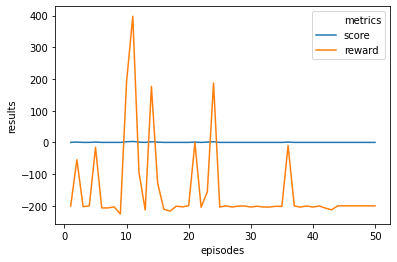

Run time: 61.847962617874146 seconds
Max. Score: 3
Mean Last Scores: 0.32


In [40]:
N0=1
gamma=1
run_monte_carlo_lfa_experiments(N0, gamma, first_visit=True)

#### Monte Carlo Every Visit LFA

Para o Monte Carlo First Visit LFA os melhores parâmetros obtidos foram N0=1, gamma=0.2 e reward_euclidean

Game 1      Score: 0
Game 2      Score: 3
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 2
Game 11      Score: 2
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 2
Game 23      Score: 1
Game 24      Score: 2
Game 25      Score: 1
Game 26      Score: 2
Game 27      Score: 1
Game 28      Score: 1
Game 29      Score: 2
Game 30      Score: 2
Game 31      Score: 1
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 2
Game 35      Score: 0
Game 36      Score: 1
Game 37      Score: 3
Game 38      Score: 2
Game 39      Score: 0
Game 40      Score: 1
Game 41      Score: 1
Game 42      Score: 0
Game 43      Score: 1
Game 44      Score: 1
Game 45      Score: 2
Game 46      Score:

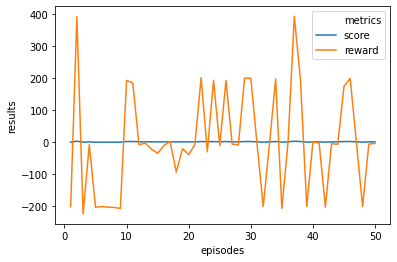

Run time: 59.25759482383728 seconds
Max. Score: 3
Mean Last Scores: 1.06


In [41]:
N0=1
gamma=0.2
run_monte_carlo_lfa_experiments(N0, gamma, first_visit=False)

### Sarsa LFA

In [42]:
def run_sarsa_lfa(agent: AgentLFA, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()

        state1, done = env.reset()
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            target = reward + agent.gamma*(agent.state_value_function(state2,decoded_action2.astype(int)))
            agent.update(target, state1, decoded_action1)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics

def run_sarsa_lfa_experiment(n0, gamma):
    # define agent
    sarsaAgent = SARSAAgentLFA(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_sarsa_lfa(sarsaAgent, reward_function=default_reward, episodes=50, speed=0, display=True)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Para o SARSA LFA os melhores parâmetros obtidos foram N0=1, gamma=0.99 e default_reward

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 2
Game 6      Score: 1
Game 7      Score: 1
Game 8      Score: 2
Game 9      Score: 3
Game 10      Score: 2
Game 11      Score: 4
Game 12      Score: 1
Game 13      Score: 2
Game 14      Score: 3
Game 15      Score: 4
Game 16      Score: 1
Game 17      Score: 3
Game 18      Score: 1
Game 19      Score: 2
Game 20      Score: 2
Game 21      Score: 3
Game 22      Score: 1
Game 23      Score: 2
Game 24      Score: 3
Game 25      Score: 7
Game 26      Score: 2
Game 27      Score: 2
Game 28      Score: 1
Game 29      Score: 4
Game 30      Score: 2
Game 31      Score: 1
Game 32      Score: 2
Game 33      Score: 2
Game 34      Score: 1
Game 35      Score: 5
Game 36      Score: 1
Game 37      Score: 4
Game 38      Score: 4
Game 39      Score: 5
Game 40      Score: 3
Game 41      Score: 7
Game 42      Score: 10
Game 43      Score: 7
Game 44      Score: 3
Game 45      Score: 4
Game 46      Score

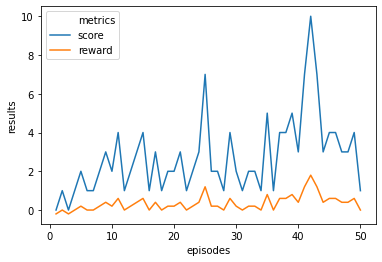

Run time: 397.11129903793335 seconds
Max. Score: 10
Mean Last Scores: 2.74


In [43]:
N0= 0.25
gamma= 0.99
run_sarsa_lfa_experiment(N0, gamma)

### Q-Learning LFA

In [46]:
def run_q_learning_lfa(agent: AgentLFA, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            screen.display()

        state1, done = env.reset()
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)

            #Calculating Target
            future_actions = []
            for a in range(agent.num_actions):
                future_actions.append(agent.state_value_function(state2,a))

            target = reward + agent.gamma*max(future_actions)

            agent.update(target, state1, decoded_action1)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)

            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)

        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break


    return metrics

def run_q_learning_lfa_experiment(n0, gamma, penalty_rate):
    # define agent
    qLearningAgent = QLearningAgentLFA(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

    start = time.time()
    metrics = run_q_learning_lfa(qLearningAgent, reward_function=lambda env: reward_linear(env, penalty_rate=penalty_rate),
                             episodes=200, speed=0, display=True)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))


Para o Q-Learning LFA os melhores parâmetros obtidos foram N0=0.5, gamma=0.98 e reward_euclidean com penalty_rate = 0.05

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 3
Game 11      Score: 0
Game 12      Score: 1
Game 13      Score: 2
Game 14      Score: 1
Game 15      Score: 2
Game 16      Score: 8
Game 17      Score: 3
Game 18      Score: 10
Game 19      Score: 3
Game 20      Score: 6
Game 21      Score: 7
Game 22      Score: 8
Game 23      Score: 4
Game 24      Score: 3
Game 25      Score: 3
Game 26      Score: 3
Game 27      Score: 3
Game 28      Score: 5
Game 29      Score: 1
Game 30      Score: 3
Game 31      Score: 2
Game 32      Score: 13
Game 33      Score: 7
Game 34      Score: 4
Game 35      Score: 5
Game 36      Score: 5
Game 37      Score: 3
Game 38      Score: 9
Game 39      Score: 7
Game 40      Score: 4
Game 41      Score: 3
Game 42      Score: 6
Game 43      Score: 5
Game 44      Score: 8
Game 45      Score: 9
Game 46      Scor

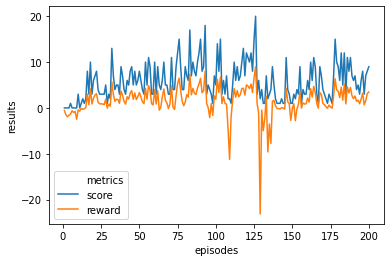

Run time: 375.12651658058167 seconds
Max. Score: 20
Mean Last Scores: 5.92


In [47]:
N0 = 0.5
gamma = 0.98
penalty_rate = 0.05
run_q_learning_lfa_experiment(N0, gamma, penalty_rate)

### Sarsa Lambda LFA

In [6]:
def run_sarsa_lambda_lfa(agent: SARSALambdaAgentLFA, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()
        agent.reset_E()
        state1, done = env.reset()
        #state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            q_new = agent.state_value_function(state2, decoded_action2)
            target = reward + agent.gamma * q_new
            agent.update(target, state1, decoded_action1)
            agent.E[decode_state(state1), decoded_action1] = agent.gamma * agent.lambda_value * agent.E[decode_state(state1), decoded_action1]

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 60: # 1min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 60: # 1min
            break
        

    return metrics

def run_sarsa_lambda_lfa_experiments(n0, gamma, lambda_value):
    sarsaAgent = SARSALambdaAgentLFA(n0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
    sarsaAgent.lambda_value = lambda_value

    start = time.time()
    metrics = run_sarsa_lambda_lfa(sarsaAgent, reward_function=default_reward, episodes=50, speed=0, display=True)
    end = time.time()

    plot_metrics(metrics, filepath=None)

    print('Run time:', (end-start), 'seconds')
    print('Max. Score:', max(metrics['scores']))
    print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))


Para o SARSA Lambda LFA os melhores parâmetros obtidos foram N0=1, gamma=0.5, default_reward e lambda = 0.

Game 1      Score: 1
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 2
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 2
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 1
Game 11      Score: 3
Game 12      Score: 1
Game 13      Score: 0
Game 14      Score: 2
Game 15      Score: 2
Game 16      Score: 4
Game 17      Score: 2
Game 18      Score: 4
Game 19      Score: 2
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 1
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 3
Game 29      Score: 4
Game 30      Score: 5
Game 31      Score: 1
Game 32      Score: 3
Game 33      Score: 4
Game 34      Score: 3
Game 35      Score: 5
Game 36      Score: 1
Game 37      Score: 4
Game 38      Score: 4
Game 39      Score: 3
Game 40      Score: 3
Game 41      Score: 2


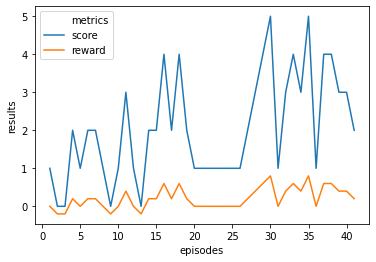

Run time: 60.16633439064026 seconds
Max. Score: 5
Mean Last Scores: 2.048780487804878


In [10]:
N0 = 1
gamma = 0.5
lambda_value = 0
run_sarsa_lambda_lfa_experiments(N0, gamma, lambda_value)

De maneira geral o desempenho do LFA para cada método foi pior do que o desempenho do método sem LFA. Acreditamos que nossa representação de estado é muito compacta, sendo um vetor de 11 posições, existindo 2^11 possibilidades apenas, o LFA não oferece vantagens. Precisariamos de um aproximador mais complexo como por exemplo uma rede neural.